/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


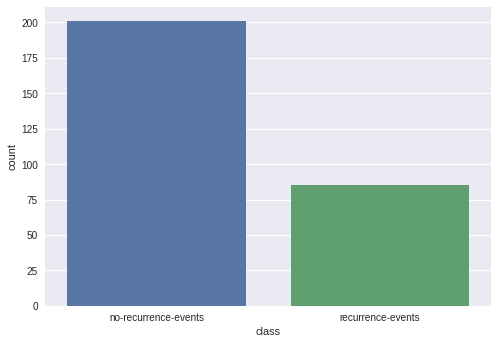

['premeno' 'ge40' 'lt40']
['no' 'yes' 'missing']
[1 0]
['left_low' 'right_up' 'left_up' 'right_low' 'central' 'missing']
[3 2 1]
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
[0 1]
[ True False  True False False  True False False  True False  True  True
  True False False False  True  True  True False False False False  True
  True False False  True  True  True  True  True  True  True False False
 False False False False  True False]
[ 1  9  1 11  8  1 16 20  1 21  1  1  1 22 10 17  1  1  1 14 13  5  4  1
  1 19  3  1  1  1  1  1  1  1 18 12  6 23  7  2  1 15]
['class', 'breast', 'age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69', 'age_70-79', 'tumor-size_0-4', 'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9', 'tumor-size_50-54', 'menopause_ge40', 'menopause_lt40', 'menopause_premeno', 'node-caps_missing', 'node-caps_no', 'node-caps_yes', 'br

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


names = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data'
df = pd.read_csv(url, names=names)

# null_data = df.loc[df['node-caps']=='?'], cerco dove sono i dati mancanti

a = df['node-caps'].replace('?', 'missing') # li rimpiazzo con la stringa missing
df['node-caps'] = a # aggiorno il df

df['breast-quad'] = df['breast-quad'].replace('?', 'missing') # lo faccio anche con l'altra colonna

countplt = sns.countplot(x=df['class'])
plt.show()
# distribuzione buona

one_zero = (df['class']=='recurrence-events').astype(int)
df['class'] = one_zero

one_zero1 = (df['breast']=='left').astype(int)
df['breast'] = one_zero1

one_zero2 = (df['irradiat']=='yes').astype(int)
df['irradiat'] = one_zero2

print(df['menopause'].unique())
print(df['node-caps'].unique())
print(df['breast'].unique())
print(df['breast-quad'].unique())
print(df['deg-malig'].unique())
print(df['inv-nodes'].unique())
print(df['irradiat'].unique())

col_list = ['age', 'tumor-size', 'menopause', 'node-caps', 'breast-quad', 'deg-malig', 'inv-nodes', 'irradiat']
df = pd.get_dummies(df, columns=col_list)

Y = df['class']
cols_of_x = [x for x in df.columns if x !='class']
X = df[cols_of_x]

model = LogisticRegression()

rfe = feature_selection.RFE(model, 20)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)

columns = df.columns.values.tolist()
print(columns)

rfe_support = rfe.support_.tolist()
selected_features = []
for i in range(len(rfe_support)):
  if rfe_support[i]==True:
    selected_features.append(columns[i])
print(selected_features)

X_new = df[selected_features]

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_new, Y, test_size=0.30, random_state=1)

model.fit(X_new, Y)

predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))